**IFSP - Campus Campinas** <br>
**Pós-graduação em Ciência de Dados** <br>
**Disciplina D3TOP/2023 – Tópicos em Ciência de Dados** <br>

**Projeto em Grupo - Parte 2**

#### Sprint 2 - v 2.2
- continuando com dados salvos no Sprint 1, já pre-processados com SpaCy
- pre-processamento com Neattext na coluna **'Ementa'** da PLO
- feature extraction com TfidfVectorizer na coluna **'Ementa'** da PLO
- treinamento com LogisticRegression
- rodado em PC local (não AWS)


Professor: Samuel Martins (samuel.martins@ifsp.edu.br)<br>
Aluno: Swift Motoo Yaguchi - CP301665X

------

### 1. Pré-processamento

##### Instalando bibliotecas

In [1]:
#Upgrade dependencies
#!pip install --upgrade pip
#!pip install --upgrade scikit-learn
#!pip install --upgrade wordcloud
#!pip install --upgrade sagemaker

In [2]:
import pandas as pd
import numpy as np

##### Leitura da base de dados salvo no Sprint 1

In [8]:
# load the datasets
df_train = pd.read_csv('test_dataset_train.csv', sep=';', index_col=False)
df_test = pd.read_csv('test_dataset_test.csv', sep=';', index_col=False)

In [9]:
df_train

,Texto,Ementa,Vereador,Data,Nota,isUtil,Label,Texto-pre
0,art 1 fica denominada rua osvualte darri rua 0...,denomina rua osvualte darri via pública municí...,Zé Carlos,2019,9,não,0,art fica denominada rua osvualte darri rua lot...
1,tbd,dispõe criação bolsões estacionamento exclusiv...,tbd,2019,6,não,0,tbd
2,art 10 fica proibido venda comercialização b...,proíbe venda brinquedos constituem réplicas si...,Carmo Luiz,2019,13,não,0,art fica proibido venda comercializao brinqued...
3,projeto lei ordinária passou tramitar projeto ...,institui programa árvores qualidade vida munic...,Luiz Rossini,2019,12,não,0,projeto lei ordinria passou tramitar projeto l...
4,art 1 fica denominado praça benedito carlos ma...,denomina praça benedito carlos martins lazer m...,Jorge Schneider,2019,9,não,0,art fica denominado praa benedito carlos marti...
...,...,...,...,...,...,...,...,...
262,tbd,dispõe permissão circulação veículos transport...,tbd,2019,6,não,0,tbd
263,tbd,institui âmbito município campinas programa fa...,tbd,2019,12,não,0,tbd
264,tbd,denomina centro saúde professora ângela campos...,tbd,2019,9,não,0,tbd
265,tbd,altera 2º acrescenta 3º 4º art 16a lei nº ...,tbd,2019,5,sim,1,tbd


In [10]:
df_test

,Texto,Ementa,Vereador,Data,Nota,isUtil,Label,Texto-pre
0,tbd,institui semana esportes eletrônicos play hard...,tbd,2019,10,não,0,tbd
1,tbd,denomina praça nilson dimarzio lazer município...,tbd,2019,9,não,0,tbd
2,tbd,institui semana esportes eletrônicos play hard...,tbd,2019,10,não,0,tbd
3,art 1 ficam alterados ss i p 3 2 art 2 2 lei n...,altera redação 1º 3º art 2º lei nº 14789 4 a...,Paulo Galterio,2019,7,não,0,art ficam alterados ss p art lei n abril passa...
4,art 1 fica denominada rua vitalino alexandre s...,denomina rua vitalino alexandre santos via púb...,Carmo Luiz,2019,9,não,0,art fica denominada rua vitalino alexandre san...
...,...,...,...,...,...,...,...,...
62,art 1º fica denominada praça etelvina ramos pr...,denomina praça etelvina ramos praça pública mu...,Luiz Rossini,2019,9,não,0,art fica denominada praa etelvina ramos praa ...
63,tbd,dispõe desembarque mulheres idosos pessoas def...,tbd,2019,6,não,0,tbd
64,tbd,garante prioridade programas habitacionais mul...,tbd,2019,7,não,0,tbd
65,tbd,garante prioridade programas habitacionais mul...,tbd,2019,7,não,0,tbd


##### Nova remoção usando biblioteca neattext na coluna 'Ementa'
- lowering, expand contractions
- remove:
  + punctuations, stop words, urls, emails, numbers, emojis, phone numbers, multiple whitespaces, currency symbols, special characters

In [11]:
import neattext.functions as ntx

def text_preprocessing(text_in: str) -> str:
    text = text_in.lower()
    text = ntx.fix_contractions(text)
    text = ntx.remove_punctuations(text)
    text = ntx.remove_stopwords(text)
    text = ntx.remove_urls(text)
    text = ntx.remove_emails(text)
    text = ntx.remove_numbers(text)
    text = ntx.remove_emojis(text)
    text = ntx.remove_phone_numbers(text)
    text = ntx.remove_multiple_spaces(text)
    text = ntx.remove_currency_symbols(text)
    text = ntx.remove_special_characters(text)
    return text

In [12]:
# progress bar in pandas
#!pip install tqdm

In [13]:
from tqdm import tqdm
tqdm.pandas()  # it enables some new progress bar functions/methods for pandas

In [14]:
# pre-process the training set
df_train['Ementa-pre'] = df_train['Ementa'].progress_apply(lambda text: text_preprocessing(text))

100%|███████████████████████████████████████████████████████████████████████████████| 267/267 [00:00<00:00, 573.32it/s]


In [15]:
df_train.head()

,Texto,Ementa,Vereador,Data,Nota,isUtil,Label,Texto-pre,Ementa-pre
0,art 1 fica denominada rua osvualte darri rua 0...,denomina rua osvualte darri via pública municí...,Zé Carlos,2019,9,não,0,art fica denominada rua osvualte darri rua lot...,denomina rua osvualte darri pblica municpio ca...
1,tbd,dispõe criação bolsões estacionamento exclusiv...,tbd,2019,6,não,0,tbd,dispe criao bolses estacionamento exclusivos m...
2,art 10 fica proibido venda comercialização b...,proíbe venda brinquedos constituem réplicas si...,Carmo Luiz,2019,13,não,0,art fica proibido venda comercializao brinqued...,probe venda brinquedos constituem rplicas simu...
3,projeto lei ordinária passou tramitar projeto ...,institui programa árvores qualidade vida munic...,Luiz Rossini,2019,12,não,0,projeto lei ordinria passou tramitar projeto l...,institui programa rvores qualidade vida municp...
4,art 1 fica denominado praça benedito carlos ma...,denomina praça benedito carlos martins lazer m...,Jorge Schneider,2019,9,não,0,art fica denominado praa benedito carlos marti...,denomina praa benedito carlos martins lazer mu...


In [16]:
# pre-process the training set
df_test['Ementa-pre'] = df_test['Ementa'].progress_apply(lambda text: text_preprocessing(text))

100%|████████████████████████████████████████████████████████████████████████████████| 67/67 [00:00<00:00, 1117.36it/s]


In [17]:
df_test.head()

,Texto,Ementa,Vereador,Data,Nota,isUtil,Label,Texto-pre,Ementa-pre
0,tbd,institui semana esportes eletrônicos play hard...,tbd,2019,10,não,0,tbd,institui semana esportes eletrnicos play hard ...
1,tbd,denomina praça nilson dimarzio lazer município...,tbd,2019,9,não,0,tbd,denomina praa nilson dimarzio lazer municpio c...
2,tbd,institui semana esportes eletrônicos play hard...,tbd,2019,10,não,0,tbd,institui semana esportes eletrnicos play hard ...
3,art 1 ficam alterados ss i p 3 2 art 2 2 lei n...,altera redação 1º 3º art 2º lei nº 14789 4 a...,Paulo Galterio,2019,7,não,0,art ficam alterados ss p art lei n abril passa...,altera redao art lei n abril dispe atendime...
4,art 1 fica denominada rua vitalino alexandre s...,denomina rua vitalino alexandre santos via púb...,Carmo Luiz,2019,9,não,0,art fica denominada rua vitalino alexandre san...,denomina rua vitalino alexandre santos pblica ...


In [18]:
# save the preprocessed datasets
df_train.to_csv('test_dataset_train_preprocessed_2.csv', sep=';', index=False)
df_test.to_csv('test_dataset_test_preprocessed_2.csv', sep=';', index=False)

#### 2.1 Word Cloud for Train Set

In [19]:
# classes/genres
notas = sorted(df_train['Nota'].unique())
print(notas)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


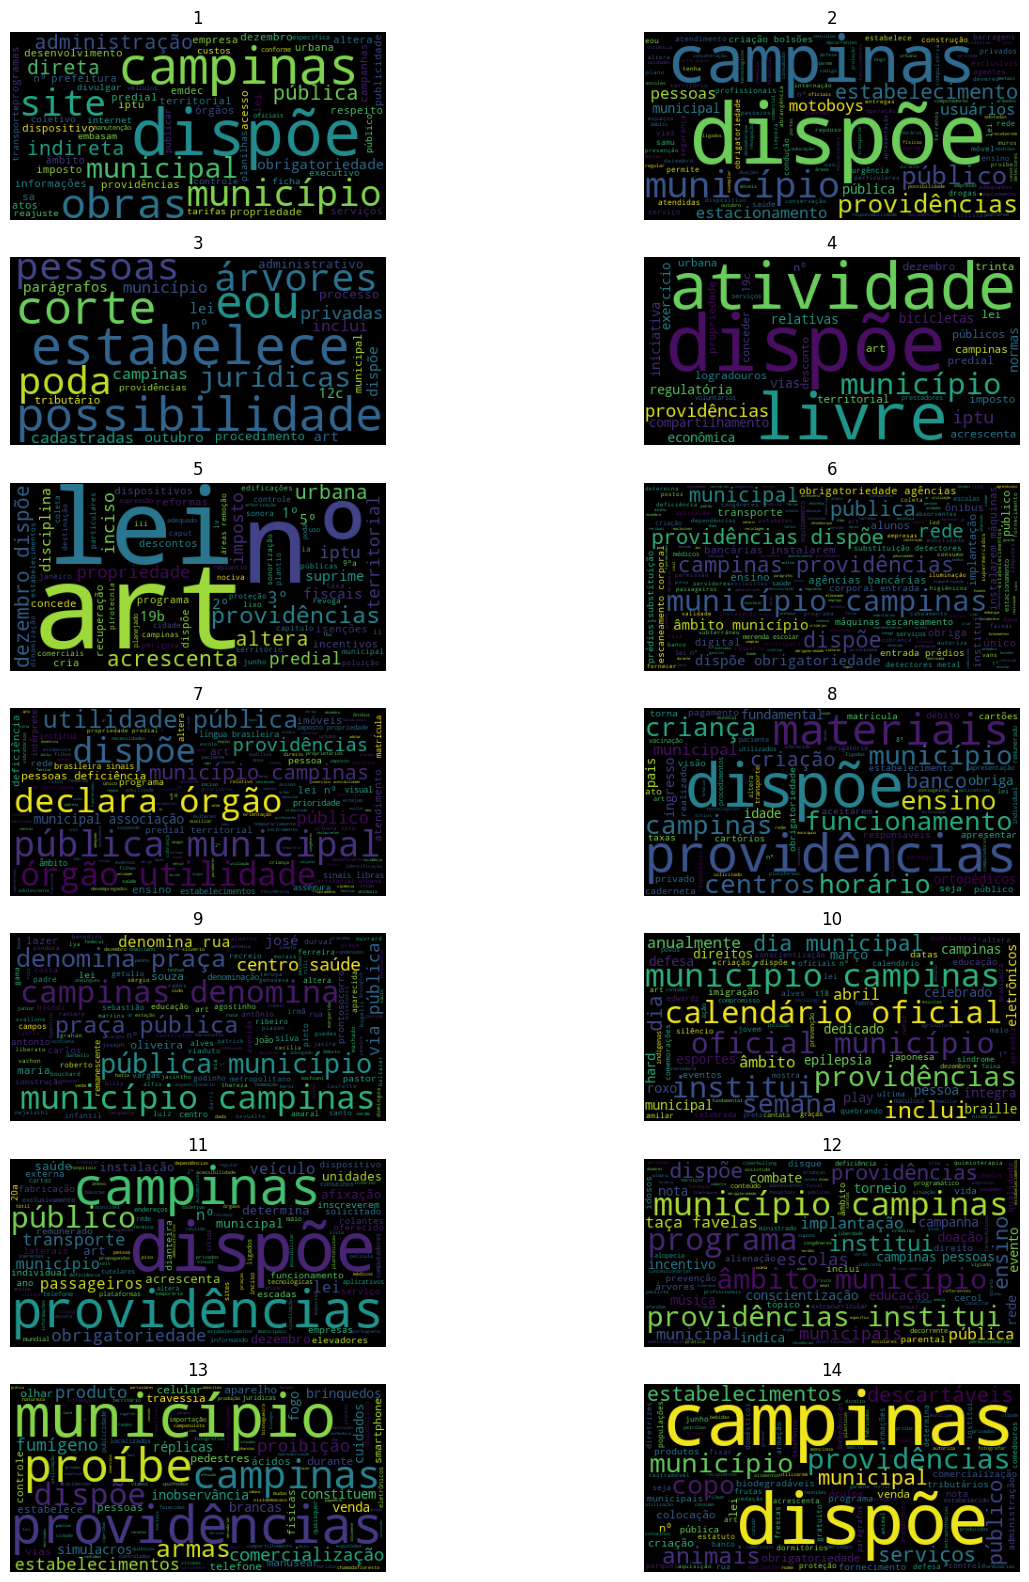

In [20]:
# plot a word cloud for each genre
import matplotlib.pyplot as plt
from wordcloud import WordCloud

fig, axes = plt.subplots(7, 2, figsize=(15, 20))
idx = 0
for row in range(7):
    for col in range(2):
        nota = notas[idx]
        
        df_nota = df_train.query("Nota == @nota")

        text = ' '.join(df_nota['Ementa'])
        wordcloud = WordCloud().generate(text)
        axes[row, col].imshow(wordcloud)
        axes[row, col].set_title(f'{nota}')
        axes[row, col].axis('off')

        idx += 1

### 3. Feature Extraction

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

X_train = tfidf.fit_transform(df_train['Ementa-pre'])
y_train = df_train['Label']

X_test = tfidf.transform(df_test['Ementa-pre'])
y_test = df_test['Label']

In [22]:
X_train.shape, X_test.shape

((267, 1153), (67, 1153))

In [23]:
print(f'Vocabulary size: {len(tfidf.vocabulary_)}')

Vocabulary size: 1153


### 5. Treinamento de modelos

In [24]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced', n_jobs=-1)

logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', n_jobs=-1)

In [25]:
# prediction on training set
y_train_pred = logreg.predict(X_train)

In [26]:
from sklearn.metrics import classification_report

#print(classification_report(y_train, y_train_pred, target_names=target_names))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       237
           1       0.88      1.00      0.94        30

    accuracy                           0.99       267
   macro avg       0.94      0.99      0.96       267
weighted avg       0.99      0.99      0.99       267



In [27]:
from sklearn.metrics import f1_score

f1_train = f1_score(y_train, y_train_pred, average='macro')

print(f'F1 Train: {f1_train}')

F1 Train: 0.9644946808510638


In [28]:
from sklearn.metrics import balanced_accuracy_score

balacc_train = balanced_accuracy_score(y_train, y_train_pred)

print(f'Balanced Acc Train: {balacc_train}')

Balanced Acc Train: 0.9915611814345991


#### Evaluate the model on the Test Set

In [29]:
# prediction on testing set
y_test_pred = logreg.predict(X_test)

In [31]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90        59
           1       0.30      0.38      0.33         8

    accuracy                           0.82        67
   macro avg       0.61      0.63      0.61        67
weighted avg       0.84      0.82      0.83        67



In [32]:
from sklearn.metrics import f1_score
f1_test = f1_score(y_test, y_test_pred, average='macro')
print(f'F1 Test: {f1_test}')

F1 Test: 0.614942528735632


O resultado **F1 score** melhorou um pouco mas ainda está baixo.